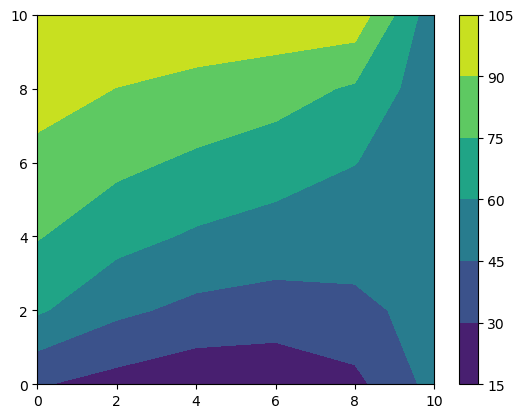

In [19]:
# soluciòn de la ecuaciòn de laplace con condiciones de neumman
import numpy as np 
import matplotlib.pyplot as plt 

# dimensiones 
Lx = 10
Ly = 10
dx = 2
dy = dx
# Material
k = 1

# discretizacion de placa
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)
# creacion de malla
X,Y = np.meshgrid(x,y)
T = np.zeros((len(y),len(x)))
dTdx = np.zeros((len(y),len(x)))
dTdy = np.zeros((len(y),len(x)))

# condiciones de frontera 
# condiciones de dirichlet
T[-1,:] = 100
T[:,-1] = 50
# condiciones de Neumman
qx0 = 0
qy0 = -12
dTdx[:,0] = - qx0/k
dTdy[0,:] = -qy0/k
Tant = np.zeros((len(y),len(x)))
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(0,len(x)-1):
        for j in range(0,len(y)-1):
            if i == 0 & j == 0:
                T[j,i] = (2*T[j][i+1]-2*dx*dTdx[j][i]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            elif i == 0:
                T[j,i] = (2*T[j][i+1]-2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            elif j == 0:
                T[j,i] = (T[j][i+1]+T[j][i-1]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            else:
                T[j,i]= (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    Error = np.max(abs(T-Tant))
plt.contourf(X,Y,T)
plt.colorbar()

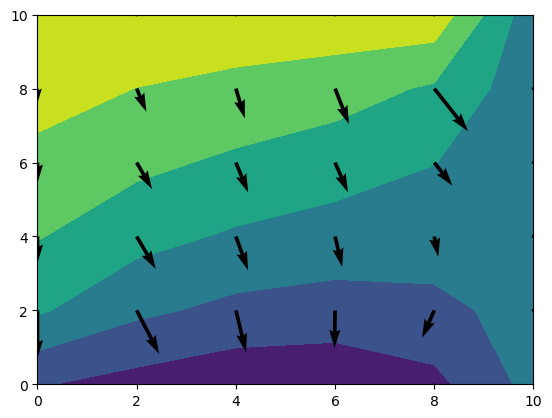

In [20]:
# Flujos en x
for i in range(1,len(x)-1):
    for j in range(0,len(y)-1):
        dTdx[j][i] = (T[j][i+1]-T[j][i-1])/2/dx

qx = -k*dTdx
# Flujos en y
for i in range(0,len(x)-1):
    for j in range(1,len(y)-1):
        dTdy[j][i] = (T[j+1][i]-T[j-1][i])/2/dy

qy = -k*dTdy
plt.contourf(X,Y,T)
plt.quiver(x,y,qx,qy)

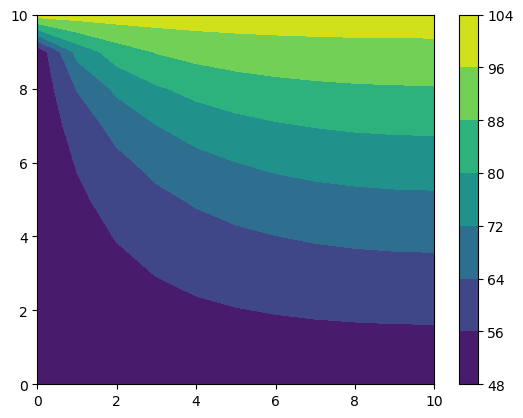

In [24]:
# soluciòn de la ecuaciòn de laplace con condiciones de neumman
import numpy as np 
import matplotlib.pyplot as plt 

# dimensiones 
Lx = 10
Ly = 10
dx = 1
dy = dx
# Material
k = 1

# discretizacion de placa
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)
# creacion de malla
X,Y = np.meshgrid(x,y)
T = np.zeros((len(y),len(x)))
dTdx = np.zeros((len(y),len(x)))
dTdy = np.zeros((len(y),len(x)))

# condiciones de frontera 
# condiciones de dirichlet
T[-1,:] = 100
T[0,:] = 50
# condiciones de Neumman
qx0 = 0
qxf = 0
dTdx[:,0] = - qx0/k
dTdx[:,-1] = -qxf/k
Tant = np.zeros((len(y),len(x)))
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(0,len(x)):
        for j in range(1,len(y)-1):
            if i == 0 & j == 0:
                T[j,i] = 50#(2*T[j][i+1]-2*dx*dTdx[j][i]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            elif i == 0:
                T[j,i] = (2*T[j][i+1]-2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            elif i == len(x)-1:
                T[j,i] = (2*T[j][i-1]+2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            else:
                T[j,i]= (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    Error = np.max(abs(T-Tant))
plt.contourf(X,Y,T)
plt.colorbar()